In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd
import cv2
import os
import random
import threading

### Different ways to check images

In [2]:
test_image = cv2.imread("Images/bengal/1e8351aa322b32f7a23980d7cdbed1a8.jpg")
test_image.shape

(1470, 2711, 3)

In [3]:
cv2.imshow("Image", test_image)
cv2.waitKey(0)
# cv2.destroyAllWindows() 

-1

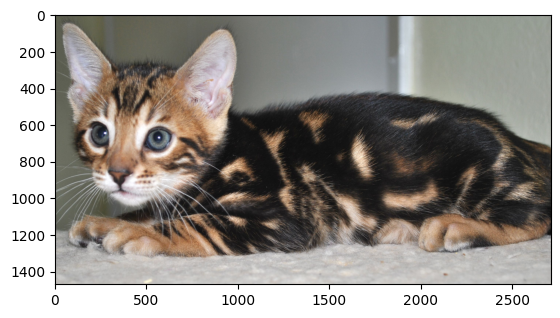

In [4]:
plt.imshow(test_image[:,:,::-1])
plt.show()

In [5]:
test_image.shape

(1470, 2711, 3)

In [ ]:
plt.imshow(mpimg.imread("Images/bengal/1e8351aa322b32f7a23980d7cdbed1a8.jpg"))
plt.show()

### Visualization

In [2]:
folders = (os.listdir('Images'))
number_of_cats_per_folder = {}

for folder in folders:
    number_of_cats_per_folder[folder] = len(os.listdir('Images/' + folder))
number_of_cats_per_folder

{'bengal': 154,
 'domestic_shorthair': 170,
 'maine_coon': 191,
 'ragdoll': 207,
 'siamese': 208}

In [8]:
# Total images

print("Total images: " + str(sum(number_of_cats_per_folder.values())))

Total images: 930


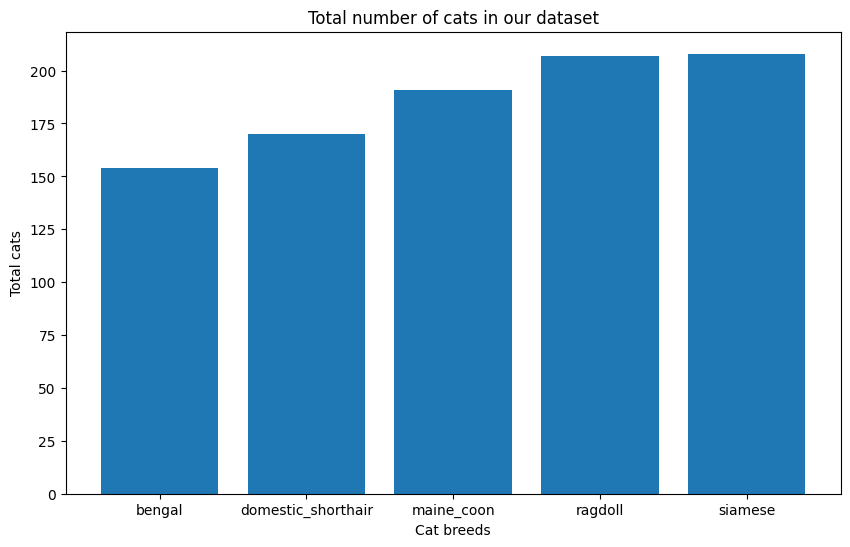

In [9]:
plt.figure(figsize = (10,6))
plt.bar(height= number_of_cats_per_folder.values(), x= number_of_cats_per_folder.keys())
plt.xlabel("Cat breeds")
plt.ylabel('Total cats')
plt.title("Total number of cats in our dataset")
# plt.xticks(rotation= 30)
plt.show()

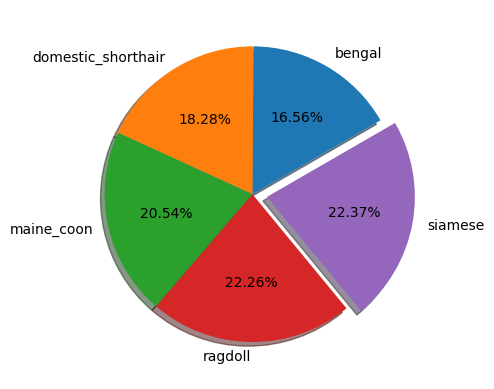

In [10]:
plt.pie(x= number_of_cats_per_folder.values(), labels= number_of_cats_per_folder.keys(), shadow= True, autopct= '%1.2f%%', startangle= 30, explode= [0,0,0,0,.1])
plt.show()

In [11]:
# Lets check each image size and how vary they are

folders = (os.listdir('Images'))
cats_per_folder = {}

for folder in folders:
    cats_per_folder[folder] = (os.listdir('Images/' + folder))

cats_per_folder['bengal'][0]

'1e8351aa322b32f7a23980d7cdbed1a8.jpg'

In [12]:
for folder in folders:

    for image in range(len(cats_per_folder[folder])):
        
        image_info = cv2.imread("Images/" + folder + '/' + cats_per_folder[folder][image])

        # Get the dimensions of the image
        height, width,channels = image_info.shape
        cats_per_folder[folder][image] = [height, width]

In [14]:
[cats_per_folder['bengal'][x][0] for x in range(len(cats_per_folder['bengal']))]

[1470,
 768,
 1080,
 2592,
 1050,
 810,
 2048,
 1080,
 900,
 1104,
 1280,
 2048,
 3210,
 3872,
 1104,
 1400,
 3084,
 1145,
 3988,
 3054,
 1500,
 960,
 3299,
 3216,
 2400,
 1024,
 960,
 1047,
 798,
 900,
 1800,
 1330,
 800,
 2848,
 799,
 768,
 768,
 947,
 1043,
 1944,
 2250,
 1321,
 1707,
 2848,
 1080,
 1024,
 1920,
 4928,
 1428,
 1811,
 768,
 2560,
 1950,
 1388,
 1541,
 1200,
 1500,
 1117,
 1500,
 770,
 1707,
 853,
 1066,
 853,
 1535,
 961,
 1771,
 1024,
 1330,
 1200,
 1066,
 1198,
 853,
 852,
 1066,
 1066,
 3744,
 1080,
 1256,
 4686,
 1089,
 4000,
 924,
 1080,
 1080,
 1932,
 1521,
 1280,
 1065,
 2736,
 853,
 2084,
 848,
 1000,
 1351,
 1366,
 1463,
 4032,
 1390,
 1600,
 1374,
 985,
 1002,
 2048,
 2903,
 963,
 4032,
 853,
 1200,
 840,
 1125,
 1158,
 1125,
 1150,
 1080,
 1121,
 853,
 798,
 3114,
 2584,
 1049,
 1126,
 1172,
 1672,
 1067,
 1553,
 2304,
 1174,
 1707,
 854,
 1068,
 787,
 1078,
 797,
 3456,
 2927,
 1024,
 1200,
 1333,
 1374,
 782,
 853,
 800,
 1920,
 912,
 1280,
 1137,
 798,


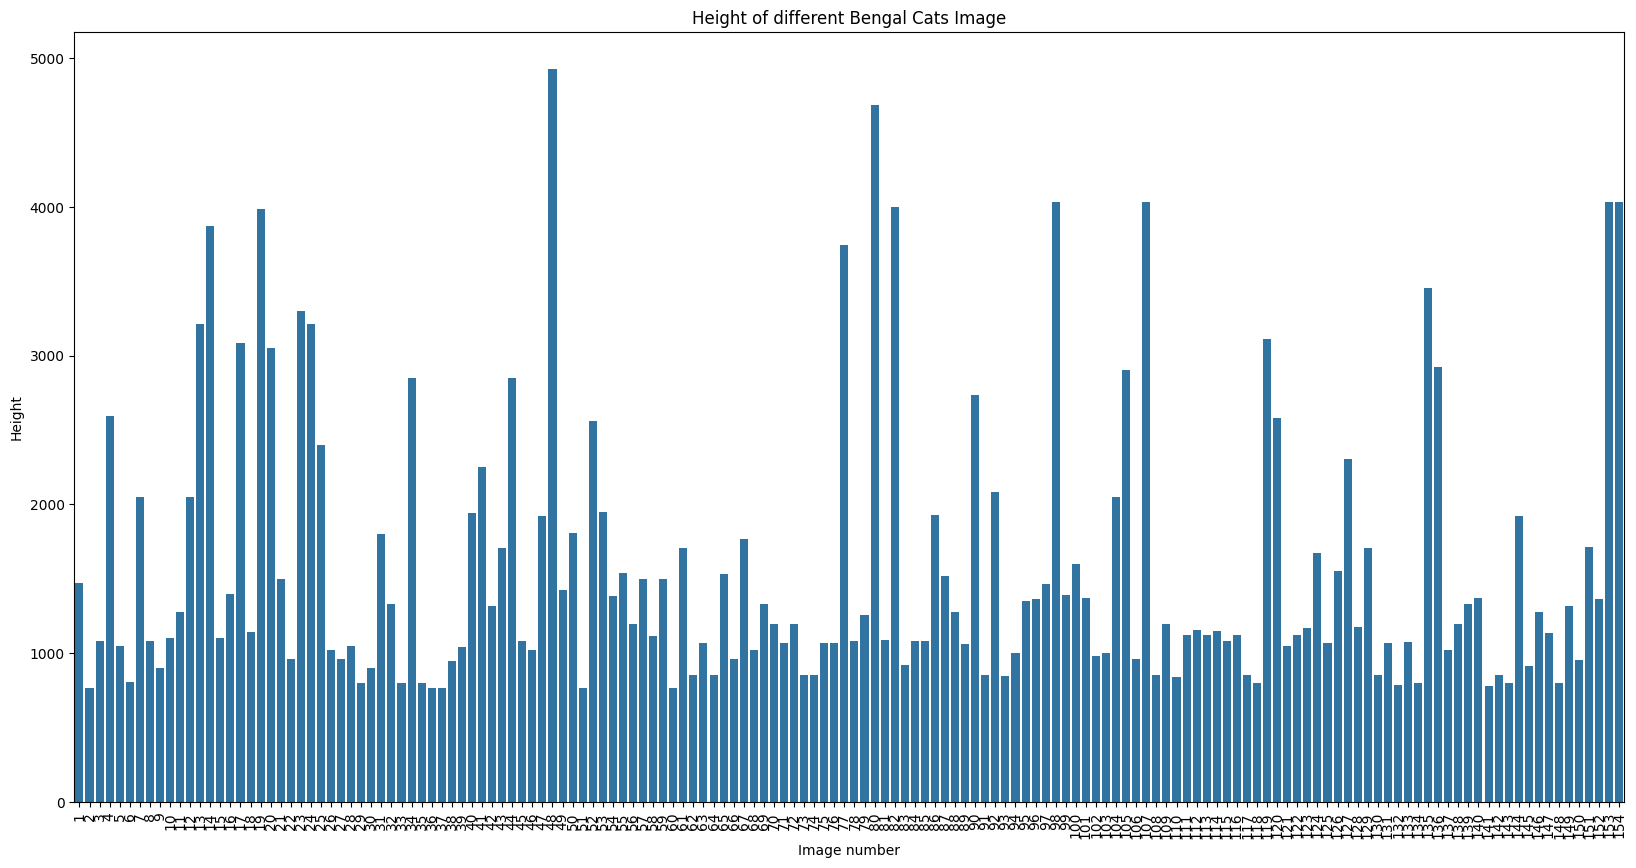

In [25]:
# cats_per_folder['bengal']
plt.figure(figsize = (20,10))
sns.barplot(x= list(range(1, len(cats_per_folder['bengal'])+1)), y= [cats_per_folder['bengal'][x][0] for x in range(len(cats_per_folder['bengal']))])
plt.xticks(rotation= 90)
plt.title("Height of different Bengal Cats Image")
plt.xlabel("Image number")
plt.ylabel("Height")
plt.show()

### Testing some of the values on how a dataframe will be created

In [ ]:
# This holds the information for each image size
cats_per_folder

(2711, 3)
(1470, 2711, 3)


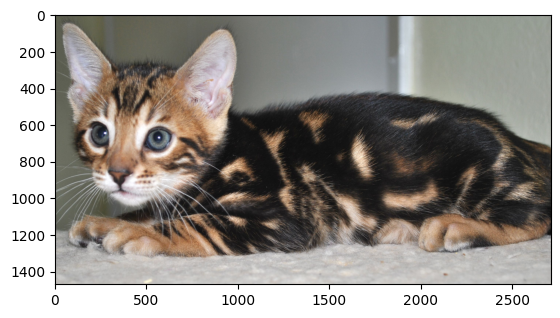

In [38]:
# Testing values

test_image = cv2.imread("Images/bengal/1e8351aa322b32f7a23980d7cdbed1a8.jpg")
# print(test_image)
print(test_image[0].shape)
print(test_image.shape)
plt.imshow(test_image[:,:,::-1])
plt.show()

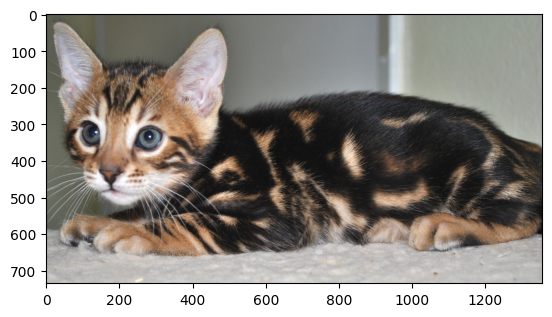

In [53]:
plt.imshow(test_image[::2,::2,::-1])
plt.show()

### Splitting folder info for train/test images

In [18]:
import splitfolders

input_folder = 'Images'
output_folder = 'Temp_Images'

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.7, 0.2, 0.1), group_prefix=None)

In [2]:
# Valuse needed for image manupulation

folders = (os.listdir('Images'))
number_of_cats_per_folder = {}

for folder in folders:
    number_of_cats_per_folder[folder] = len(os.listdir('Images/' + folder))
number_of_cats_per_folder


number_of_cats_per_folder_train = {}
folders = os.listdir('Images')

for folder in folders:
    number_of_cats_per_folder_train[folder] = len(os.listdir('Temp_Images/train/' + folder))
number_of_cats_per_folder_train

# We are updating the number of images we have in training data to close to the below specified number

TOTAL_IMAGE = 500
SPLITTING_IMAGE = 4                     # Splitting image in 1/4 size


# Creating Model_Images_Train directory
output_folder = "Model_Images_Train/"     
if not os.path.exists("Model_Images_Train"):
    os.mkdir("Model_Images_Train")

Using threading for faster image manupulation

In [ ]:
# Making seperate cells for each cat breed - bengal
folder = 'bengal'

# Checking if the folder is there
if not os.path.exists("Model_Images_Train/" + folder):
    os.mkdir("Model_Images_Train/" + folder)

# Setting parameters
temp_image_counter = 0                                                                          # Setting temp_image_counter as we will be making images for train set
image_iterator = 0                                                                              # This will keep track on which image we are at currently
threads = []
counter_lock = threading.Lock()

# Processing Image
def process_image(folder, cur_image):
    global temp_image_counter
    reading_image = cv2.imread("Temp_Images/train/" + folder + "/" + cur_image)

    # Splitting image and saving those images
    for i in range(SPLITTING_IMAGE):
        split_image = reading_image[i::SPLITTING_IMAGE, i::SPLITTING_IMAGE, :]
        output_filename = f"{output_folder + folder}/{cur_image.split('.')[0]}_{str(random.randint(1, 10000))}.jpg"
        cv2.imwrite(output_filename, split_image)
        
        # Increment the counter safely
        with counter_lock:
            temp_image_counter += 1

# Looping through the train images
while temp_image_counter < TOTAL_IMAGE:
    cur_image = os.listdir('Temp_Images/train/' + folder)[image_iterator]                        # Getting the images with index
    
    # Create and start a thread for each image processing task
    thread = threading.Thread(target=process_image, args=(folder, cur_image))
    threads.append(thread)
    thread.start()

    # Updating image_iterator
    if image_iterator >= number_of_cats_per_folder_train[folder] - 1:
        image_iterator = 0
    else:
        image_iterator += 1

# Wait for all threads to complete
for thread in threads:
    thread.join()

In [ ]:
# Making seperate cells for each cat breed - domestic_shorthair
folder = 'domestic_shorthair'

# Checking if the folder is there
if not os.path.exists("Model_Images_Train/" + folder):
    os.mkdir("Model_Images_Train/" + folder)

# Setting parameters
temp_image_counter = 0
image_iterator = 0
threads = []
counter_lock = threading.Lock()

# Processing Image
def process_image(folder, cur_image):
    global temp_image_counter
    reading_image = cv2.imread("Temp_Images/train/" + folder + "/" + cur_image)

    # Splitting image and saving those images
    for i in range(SPLITTING_IMAGE):
        split_image = reading_image[i::SPLITTING_IMAGE, i::SPLITTING_IMAGE, :]
        output_filename = f"{output_folder + folder}/{cur_image.split('.')[0]}_{str(random.randint(1, 10000))}.jpg"
        cv2.imwrite(output_filename, split_image)
        
        # Increment the counter safely
        with counter_lock:
            temp_image_counter += 1

# Looping through the train images
while temp_image_counter < TOTAL_IMAGE:
    cur_image = os.listdir('Temp_Images/train/' + folder)[image_iterator]
    
    # Create and start a thread for each image processing task
    thread = threading.Thread(target=process_image, args=(folder, cur_image))
    threads.append(thread)
    thread.start()

    # Updating image_iterator
    if image_iterator >= number_of_cats_per_folder_train[folder] - 1:
        image_iterator = 0
    else:
        image_iterator += 1

# Wait for all threads to complete
for thread in threads:
    thread.join()

In [3]:
# Making seperate cells for each cat breed - maine_coon
folder = 'maine_coon'

# Checking if the folder is there
if not os.path.exists("Model_Images_Train/" + folder):
    os.mkdir("Model_Images_Train/" + folder)

# Setting parameters
temp_image_counter = 0
image_iterator = 0
threads = []
counter_lock = threading.Lock()

# Processing Image
def process_image(folder, cur_image):
    global temp_image_counter
    reading_image = cv2.imread("Temp_Images/train/" + folder + "/" + cur_image)

    # Splitting image and saving those images
    for i in range(SPLITTING_IMAGE):
        split_image = reading_image[i::SPLITTING_IMAGE, i::SPLITTING_IMAGE, :]
        output_filename = f"{output_folder + folder}/{cur_image.split('.')[0]}_{str(random.randint(1, 10000))}.jpg"
        cv2.imwrite(output_filename, split_image)
        
        # Increment the counter safely
        with counter_lock:
            temp_image_counter += 1

# Looping through the train images
while temp_image_counter < TOTAL_IMAGE:
    cur_image = os.listdir('Temp_Images/train/' + folder)[image_iterator]
    
    # Create and start a thread for each image processing task
    thread = threading.Thread(target=process_image, args=(folder, cur_image))
    threads.append(thread)
    thread.start()

    # Updating image_iterator
    if image_iterator >= number_of_cats_per_folder_train[folder] - 1:
        image_iterator = 0
    else:
        image_iterator += 1

# Wait for all threads to complete
for thread in threads:
    thread.join()

In [4]:
# Making seperate cells for each cat breed - ragdoll
folder = 'ragdoll'

# Checking if the folder is there
if not os.path.exists("Model_Images_Train/" + folder):
    os.mkdir("Model_Images_Train/" + folder)

# Setting parameters
temp_image_counter = 0
image_iterator = 0
threads = []
counter_lock = threading.Lock()

# Processing Image
def process_image(folder, cur_image):
    global temp_image_counter
    reading_image = cv2.imread("Temp_Images/train/" + folder + "/" + cur_image)

    # Splitting image and saving those images
    for i in range(SPLITTING_IMAGE):
        split_image = reading_image[i::SPLITTING_IMAGE, i::SPLITTING_IMAGE, :]
        output_filename = f"{output_folder + folder}/{cur_image.split('.')[0]}_{str(random.randint(1, 10000))}.jpg"
        cv2.imwrite(output_filename, split_image)
        
        # Increment the counter safely
        with counter_lock:
            temp_image_counter += 1

# Looping through the train images
while temp_image_counter < TOTAL_IMAGE:
    cur_image = os.listdir('Temp_Images/train/' + folder)[image_iterator]
    
    # Create and start a thread for each image processing task
    thread = threading.Thread(target=process_image, args=(folder, cur_image))
    threads.append(thread)
    thread.start()

    # Updating image_iterator
    if image_iterator >= number_of_cats_per_folder_train[folder] - 1:
        image_iterator = 0
    else:
        image_iterator += 1

# Wait for all threads to complete
for thread in threads:
    thread.join()

In [5]:
# Making seperate cells for each cat breed - siamese
folder = 'siamese'

# Checking if the folder is there
if not os.path.exists("Model_Images_Train/" + folder):
    os.mkdir("Model_Images_Train/" + folder)

# Setting parameters
temp_image_counter = 0
image_iterator = 0
threads = []
counter_lock = threading.Lock()

# Processing Image
def process_image(folder, cur_image):
    global temp_image_counter
    reading_image = cv2.imread("Temp_Images/train/" + folder + "/" + cur_image)

    # Splitting image and saving those images
    for i in range(SPLITTING_IMAGE):
        split_image = reading_image[i::SPLITTING_IMAGE, i::SPLITTING_IMAGE, :]
        output_filename = f"{output_folder + folder}/{cur_image.split('.')[0]}_{str(random.randint(1, 10000))}.jpg"
        cv2.imwrite(output_filename, split_image)
        
        # Increment the counter safely
        with counter_lock:
            temp_image_counter += 1

# Looping through the train images
while temp_image_counter < TOTAL_IMAGE:
    cur_image = os.listdir('Temp_Images/train/' + folder)[image_iterator]
    
    # Create and start a thread for each image processing task
    thread = threading.Thread(target=process_image, args=(folder, cur_image))
    threads.append(thread)
    thread.start()

    # Updating image_iterator
    if image_iterator >= number_of_cats_per_folder_train[folder] - 1:
        image_iterator = 0
    else:
        image_iterator += 1

# Wait for all threads to complete
for thread in threads:
    thread.join()

### Modelling

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [16]:
BATCH_SIZE = 32
IMG_HEIGHT = 180
IMG_WIDTH = 180

#### Updating images for better model training

In [20]:
# Using all the data form the folder 'train' to be used for training the model

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# To update the image but changing image information
train_datagen=ImageDataGenerator(
    rotation_range=90,      
    horizontal_flip=True,   
    vertical_flip=True,
    brightness_range=[0.8, 1.2],  
)

train_generator = train_datagen.flow_from_directory(
                                                 directory = 'Model_Images_Train', 
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 color_mode='rgb',
                                                 batch_size= BATCH_SIZE,
                                                 class_mode='categorical',
)

Found 2659 images belonging to 5 classes.


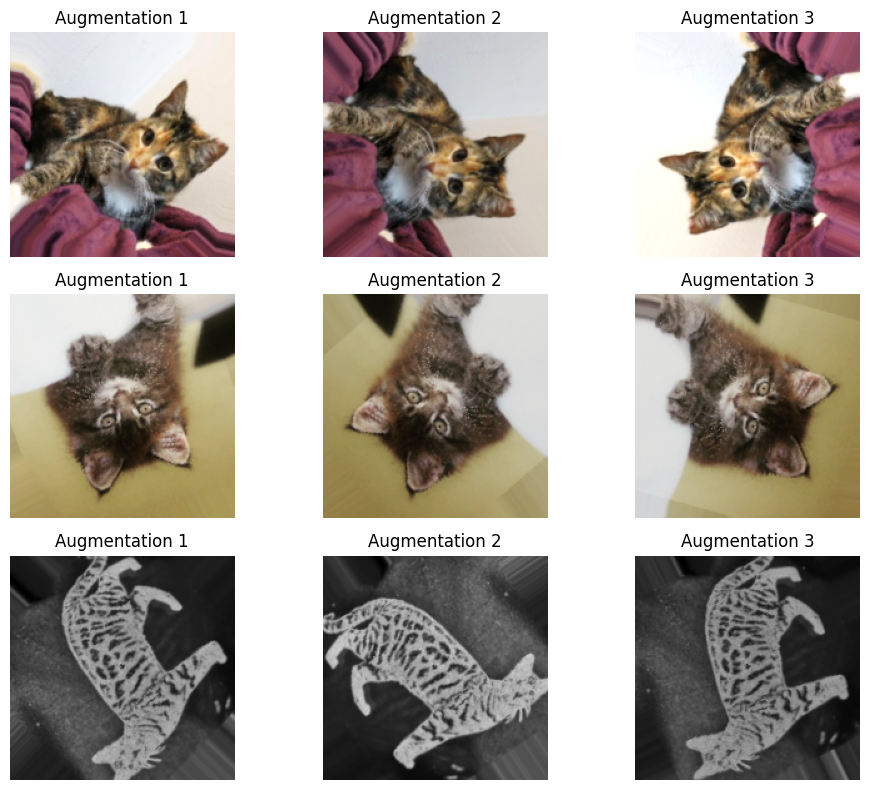

In [21]:
def plot_augmentations(generator):
    x_batch, y_batch = next(generator)
    fig, axes = plt.subplots(3, 3, figsize=(10, 8))

    for i in range(3):
        for j in range(3):
            aug_image = train_datagen.random_transform(x_batch[i])
            axes[i, j].imshow(aug_image.astype(np.uint8))
            axes[i, j].set_title('Augmentation {}'.format(j + 1))
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

# Plot the augmentations
plot_augmentations(train_generator)

In [23]:
test_datagen=ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
                                                 directory = 'Temp_Images/test', 
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=False
)


val_datagen=ImageDataGenerator()

val_generator = val_datagen.flow_from_directory(
                                                 directory = 'Temp_Images/val', 
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=False
)

Found 99 images belonging to 5 classes.
Found 184 images belonging to 5 classes.


#### Training the model

Creating the model using CNN

In [29]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'Model_Images_Train',
  # validation_split=0.2,
  # subset = "training",
  seed=42,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size= BATCH_SIZE)

Found 2659 files belonging to 5 classes.


In [33]:
test_df = tf.keras.utils.image_dataset_from_directory(
  'Temp_Images/test',
  # validation_split=0.2,
  # subset="validation",
  seed=42,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 99 files belonging to 5 classes.


In [32]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  'Temp_Images/val',
  # validation_split=0.2,
  # subset="validation",
  seed=42,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 184 files belonging to 5 classes.


In [34]:
class_names = train_ds.class_names
print(class_names)

['bengal', 'domestic_shorthair', 'maine_coon', 'ragdoll', 'siamese']


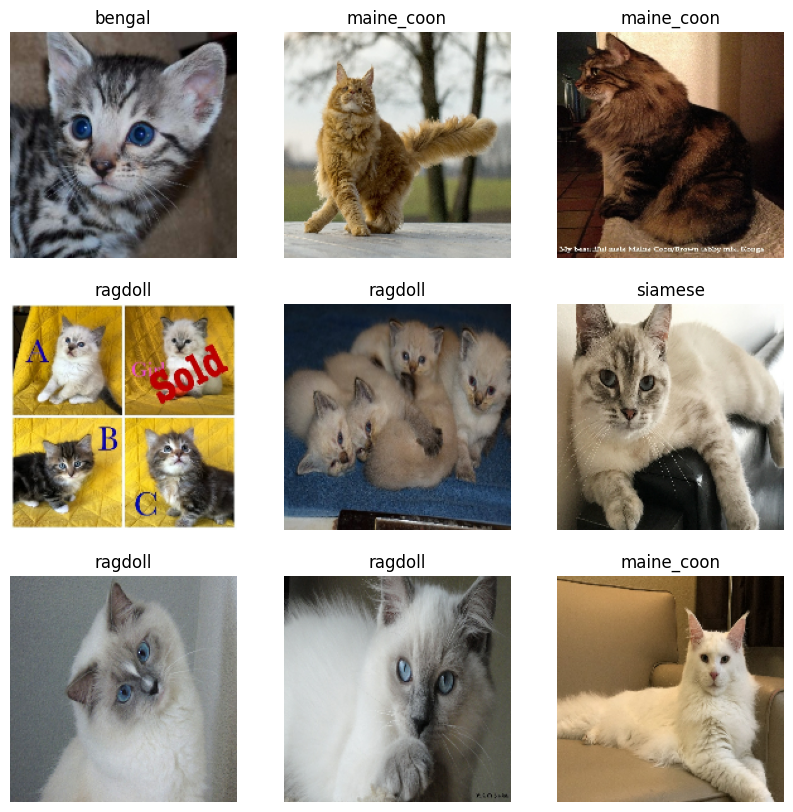

In [35]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [36]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [37]:
normalization_layer = layers.Rescaling(1./255)

In [38]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9999797


In [39]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(IMG_HEIGHT,
                                  IMG_WIDTH,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

d:\Projects\cat_v1\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


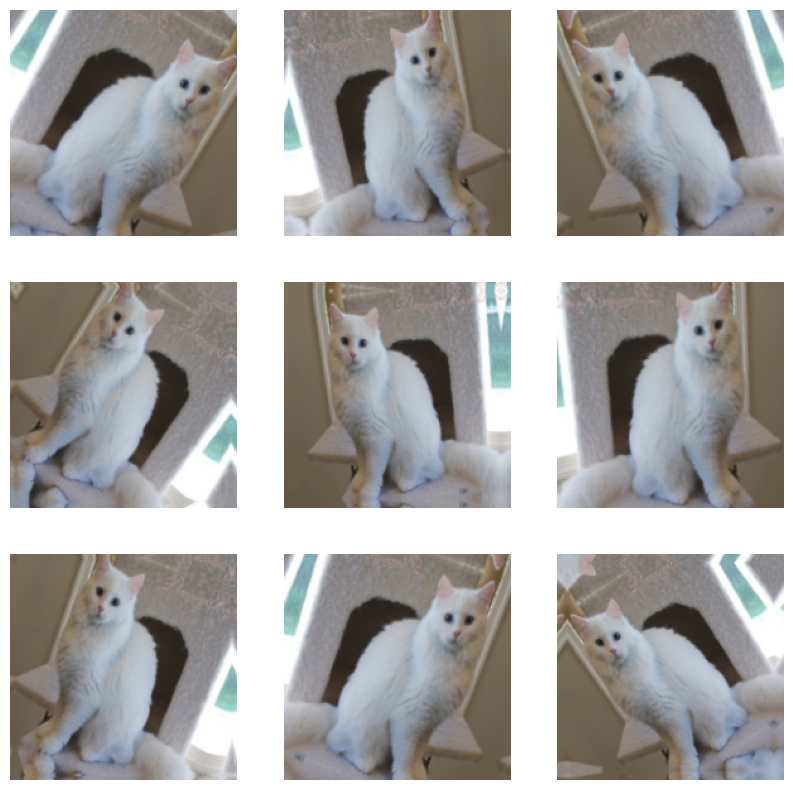

In [40]:
# Visulizing augumented image

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

plt.show()

In [60]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

model.build(input_shape=(None, IMG_HEIGHT, IMG_WIDTH, 3))

In [61]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_16 (Rescaling)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# Training

epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.2376 - loss: 1.8794 - val_accuracy: 0.4185 - val_loss: 1.5058
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - accuracy: 0.4027 - loss: 1.3979 - val_accuracy: 0.3261 - val_loss: 1.9080
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.4746 - loss: 1.2385 - val_accuracy: 0.4185 - val_loss: 1.6261
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.5216 - loss: 1.1588 - val_accuracy: 0.4402 - val_loss: 1.4909
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.5479 - loss: 1.1505 - val_accuracy: 0.3641 - val_loss: 1.9798
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - accuracy: 0.5959 - loss: 1.0246 - val_accuracy: 0.4239 - val_loss: 1.7511
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - accuracy: 0.6338 - loss: 0.9302 - val_accuracy: 0.4076 - val_loss: 2.2108
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 12s 138ms/step - accuracy: 0.6486 - loss: 0.8761 - val_accu

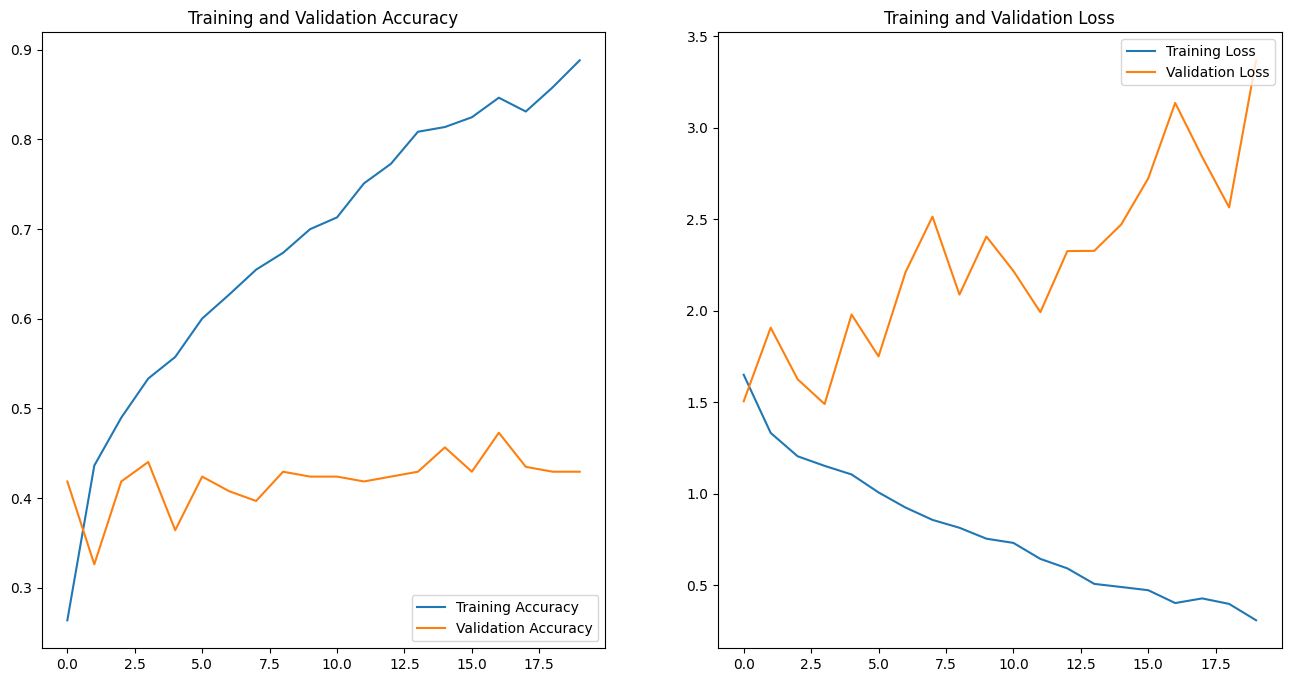

In [65]:
# Visualizing the model performance

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Using EfficientNetB4

In [66]:
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.models import Sequential

# Load the EfficientNetB4 model with pre-trained weights, excluding the top layers
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the base model
base_model.trainable = False

# Create the model
model = Sequential([
    base_model,
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f'Test accuracy: {test_acc:.2f}')

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 102s 1000ms/step - accuracy: 0.6125 - loss: 1.2263 - val_accuracy: 0.8188 - val_loss: 0.5330
Epoch 2/20
 1/83 ━━━━━━━━━━━━━━━━━━━━ 1:10 860ms/step - accuracy: 0.8125 - loss: 0.5817

C:\Users\keera\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8125 - loss: 0.5817 - val_accuracy: 0.7500 - val_loss: 0.7957
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 81s 950ms/step - accuracy: 0.8228 - loss: 0.5009 - val_accuracy: 0.7750 - val_loss: 0.6537
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9688 - loss: 0.1010 - val_accuracy: 0.7083 - val_loss: 1.1431
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 81s 957ms/step - accuracy: 0.8584 - loss: 0.4079 - val_accuracy: 0.7563 - val_loss: 0.7702
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8438 - loss: 0.4060 - val_accuracy: 0.7083 - val_loss: 1.2771
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 79s 927ms/step - accuracy: 0.8811 - loss: 0.3477 - val_accuracy: 0.8062 - val_loss: 0.5824
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8438 - loss: 0.4359 - val_accuracy: 0.7083 - val_loss: 1.1164
Epoch 9/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 80s 934ms/step - accuracy: 0.9189 - loss: 0.2435 - val_accuracy: 0.7937 - val_

In [67]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb4 (Functional)     │ (None, 6, 6, 1792)     │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 6, 6, 1792)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 64)       │     1,032,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │       295,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,664,560 (82.64 MB)

 Trainable params: 1,330,245 (5.07 MB)

 Non-trainable params: 17,673,823 (67.42 MB)

 Optimizer params: 2,660,492 (10.15 MB)

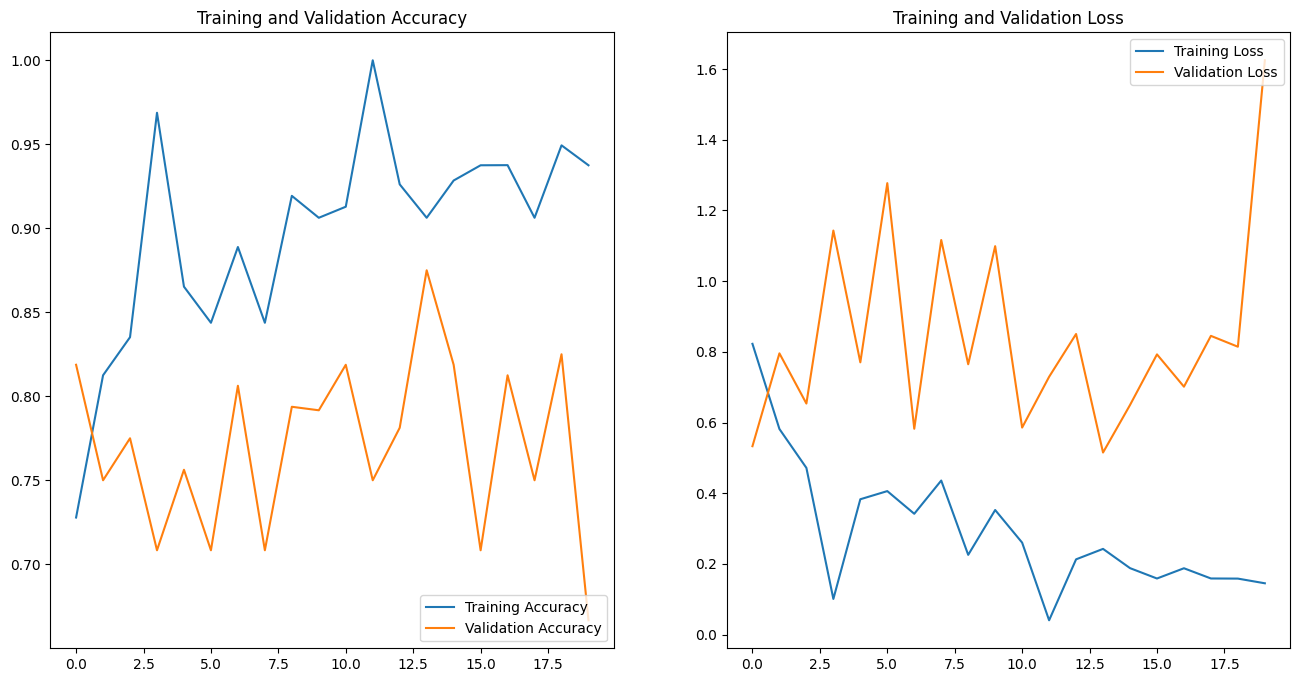

In [68]:
# Visualizing the model performance

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()